**Nama Kelompok :** Mandalika

**Anggota :**
1. Ardilla Safitri
2. Jonse Kennedy
3. Fakhry Husnul
4. Lise Listianti
5. Riska Diah N
6. Arni Cici Suryani

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df = pd.read_csv('E Commerce Dataset.csv', sep=';')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [3]:
# informasi general tentang dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### Statistical Summary

In [4]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
cats = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

In [5]:
# ringkasan statistik dari kolom numerik
df[nums].describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [6]:
# categorical columns 
df[cats].describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


# Missing Data

In [7]:
# jumlah entry NULL di setiap kolom
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

jumlah data yang missing values cukup besar dengan jumlah data yang tidak besar sehingga kita menggunakan strategi imputasi dengan asumsi sebagai berikut:
* `Tenure` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `WarehouseToHome` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `HourSpendOnApp` \: impute dengan nilai modus
* `OrderAmountHikeFromlastYear` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `CouponUsed` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `OrderCount` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `DaySinceLastOrder` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)

In [8]:
# impute Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, dan DaySinceLastOrder
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(), inplace=True)
df['OrderCount'].fillna(df['OrderCount'].median(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)

In [9]:
# Impute HourSpendOnApp dengan modus
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mode()[0], inplace=True)

In [10]:
# cek jumlah missing data setelah preprocessing
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

# Duplicated Data

In [11]:
# cek jumlah duplicated rows dari semua kolom
df.duplicated().sum()

0

`Tidak terdapat data yang duplicate`

# Outliers Handling

Pengamatan:
* `Tenure` \: dihapus
* `WarehouseToHome` \: tidak perlu dihapus
* `HourSpendOnApp` \: tidak perlu dihapus
* `NumberOfDeviceRegistered` \: tidak perlu dihapus
* `NumberOfAddress` \: dihapus
* `OrderAmountHikeFromlastYear` \: tidak perlu dihapus
* `CouponUsed` \: tidak perlu dihapus
* `OrderCount` \: tidak perlu dihapus
* `DaySinceLastOrder` \: tidak perlu dihapus
* `CashbackAmount` \: tidak perlu dihapus

In [12]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['Tenure', 'NumberOfAddress']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries] 

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 5622


# Feature Transformation

1. Log transformation: `Tenure`, `WarehouseToHome`, `NumberOfAddress`, `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`, dan `DaySinceLastOrder` 
2. Standardization: `HourSpendApp`, `NumberOfDeviceRegistered `, `SatisfactionScore`, dan  `CashbackAmount`

Namun `Tenure`, `CouponUsed`, `DaySinceLastOrder` memiliki data bernilai nol, maka akan dilakukan penambahan nilai setengah dari nilai terkecil selain nol.

In [13]:
df['Tenure']= df['Tenure']+0.5
df['CouponUsed']= df['CouponUsed']+0.5
df['DaySinceLastOrder']= df['DaySinceLastOrder']+0.5

# Log/Exp Transformation

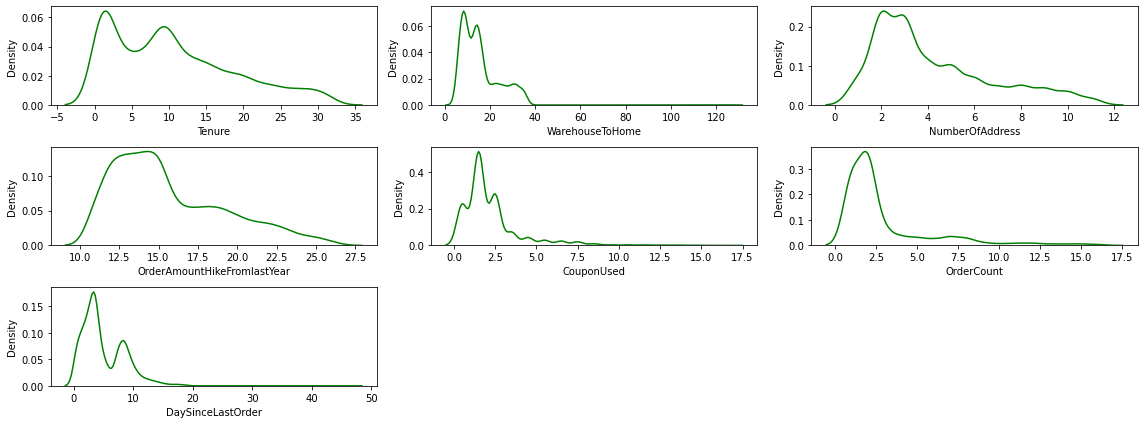

In [14]:
#distribusi nilai asli
features = ['Tenure','WarehouseToHome','NumberOfAddress','OrderAmountHikeFromlastYear','CouponUsed','OrderCount', 'DaySinceLastOrder']
plt.figure(figsize=(16, 6))
for i in range(0, len(features)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

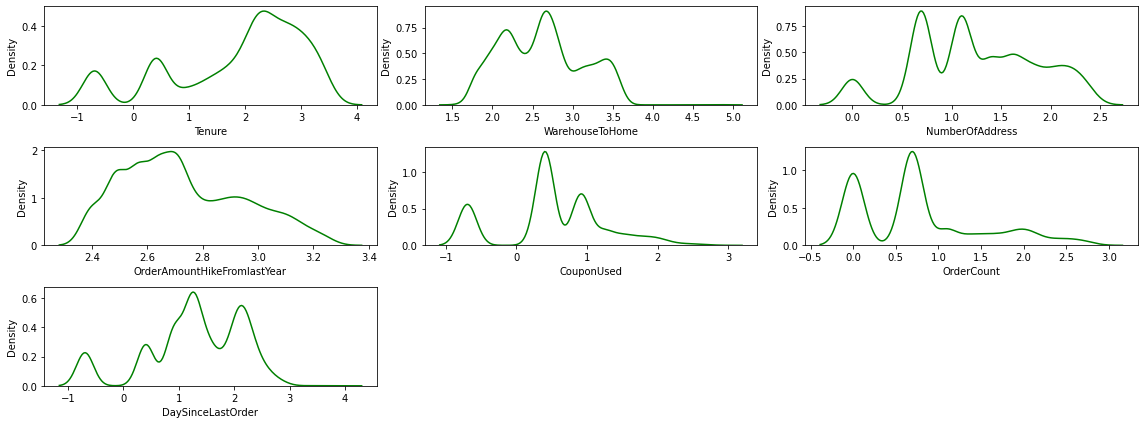

In [15]:
# distribusi gaji (setelah log transformation)
plt.figure(figsize=(16, 6))
for i in range(0, len(features)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=np.log(df[features[i]]), color='green')
    plt.xlabel(features[i])
    plt.tight_layout()
# lebih mendekati distribusi normal!

In [16]:
# kita tranformasi
df['Tenure'] = np.log(df['Tenure'])
df['WarehouseToHome'] = np.log(df['WarehouseToHome'])
df['NumberOfAddress'] = np.log(df['NumberOfAddress'])
df['OrderAmountHikeFromlastYear'] = np.log(df['OrderAmountHikeFromlastYear'])
df['CouponUsed'] = np.log(df['CouponUsed'])
df['OrderCount'] = np.log(df['OrderCount'])
df['DaySinceLastOrder'] = np.log(df['DaySinceLastOrder'])

# Normalization/Standardization

In [17]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000
mean,52815.866418,0.168268,1.875704,1.654927,2.616845,2.934187,3.689968,3.067592,1.254831,0.284596,2.727294,0.527959,0.776407,1.294747,177.200107
std,1625.260979,0.374137,1.179605,0.915439,0.501227,0.705488,1.023702,1.380366,0.611662,0.451262,0.217625,0.735542,0.725769,0.868645,49.172150
min,50001.000000,0.000000,-0.693147,1.000000,1.609438,0.000000,1.000000,1.000000,0.000000,0.000000,2.397895,-0.693147,0.000000,-0.693147,0.000000
25%,51409.250000,0.000000,1.252763,1.000000,2.197225,2.000000,3.000000,2.000000,0.693147,0.000000,2.564949,0.405465,0.000000,0.916291,146.000000
50%,52815.500000,0.000000,2.251292,1.000000,2.639057,3.000000,4.000000,3.000000,1.098612,0.000000,2.708050,0.405465,0.693147,1.252763,163.000000
75%,54223.750000,0.000000,2.740840,3.000000,2.995732,3.000000,4.000000,4.000000,1.791759,1.000000,2.890372,0.916291,1.098612,2.014903,196.000000
max,55630.000000,1.000000,3.449988,3.000000,4.844187,5.000000,6.000000,5.000000,2.397895,1.000000,3.258097,2.803360,2.772589,3.839452,325.000000


In [18]:
from sklearn.preprocessing import StandardScaler

#standarisasi (karena distribusi datanya sudah mendekati normal)
df['HourSpendOnApp'] = StandardScaler().fit_transform(df['HourSpendOnApp'].values.reshape(len(df), 1))
df['NumberOfDeviceRegistered'] = StandardScaler().fit_transform(df['NumberOfDeviceRegistered'].values.reshape(len(df), 1))
df['SatisfactionScore'] = StandardScaler().fit_transform(df['SatisfactionScore'].values.reshape(len(df), 1))
df['CashbackAmount_std'] = StandardScaler().fit_transform(df['CashbackAmount'].values.reshape(len(df), 1))

In [19]:
# cek keberhasilan feature transformation
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CashbackAmount_std
count,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5.622000e+03,5.622000e+03,5.622000e+03,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5.622000e+03
mean,52815.866418,0.168268,1.875704,1.654927,2.616845,1.415984e-14,5.875098e-15,5.766329e-16,1.254831,0.284596,2.727294,0.527959,0.776407,1.294747,177.200107,-7.882347e-17
std,1625.260979,0.374137,1.179605,0.915439,0.501227,1.000089e+00,1.000089e+00,1.000089e+00,0.611662,0.451262,0.217625,0.735542,0.725769,0.868645,49.172150,1.000089e+00
min,50001.000000,0.000000,-0.693147,1.000000,1.609438,-4.159457e+00,-2.627921e+00,-1.497990e+00,0.000000,0.000000,2.397895,-0.693147,0.000000,-0.693147,0.000000,-3.603989e+00
25%,51409.250000,0.000000,1.252763,1.000000,2.197225,-1.324289e+00,-6.740530e-01,-7.734806e-01,0.693147,0.000000,2.564949,0.405465,0.000000,0.916291,146.000000,-6.345641e-01
50%,52815.500000,0.000000,2.251292,1.000000,2.639057,9.329528e-02,3.028808e-01,-4.897078e-02,1.098612,0.000000,2.708050,0.405465,0.693147,1.252763,163.000000,-2.888092e-01
75%,54223.750000,0.000000,2.740840,3.000000,2.995732,9.329528e-02,3.028808e-01,6.755391e-01,1.791759,1.000000,2.890372,0.916291,1.098612,2.014903,196.000000,3.823621e-01
max,55630.000000,1.000000,3.449988,3.000000,4.844187,2.928463e+00,2.256748e+00,1.400049e+00,2.397895,1.000000,3.258097,2.803360,2.772589,3.839452,325.000000,3.006032e+00


# Feature Encoding

In [20]:
cats_updated = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

for col in cats_updated:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column PreferredLoginDevice
Mobile Phone    2762
Computer        1630
Phone           1230
Name: PreferredLoginDevice, dtype: int64
------------------------------ 

value counts of column PreferredPaymentMode
Debit Card          2308
Credit Card         1501
E wallet             614
UPI                  414
COD                  363
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64
------------------------------ 

value counts of column Gender
Male      3378
Female    2244
Name: Gender, dtype: int64
------------------------------ 

value counts of column PreferedOrderCat
Laptop & Accessory    2046
Mobile Phone          1270
Fashion                826
Mobile                 808
Grocery                408
Others                 264
Name: PreferedOrderCat, dtype: int64
------------------------------ 

value counts of column MaritalStatus
Married     2984
Single      1792
Divorced     846
Name: MaritalStatus, dtype: int64
------------

Data tidak sesuai (Mobile Phone = Phone, Credit Card = CC, dan COD = Cash on Delivery, Mobile Phone=Mobile) akan di rename

In [21]:
df['PreferredLoginDevice'].replace(['Phone'], 'Mobile Phone', inplace=True)
df['PreferredPaymentMode'].replace(['CC'], 'Credit Card', inplace=True)
df['PreferredPaymentMode'].replace(['Cash on Delivery'], 'COD', inplace=True)
df['PreferedOrderCat'].replace(['Mobile'], 'Mobile Phone', inplace=True)

In [22]:
#cek ulang setelah rename
cats_updated = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

for col in cats_updated:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column PreferredLoginDevice
Mobile Phone    3992
Computer        1630
Name: PreferredLoginDevice, dtype: int64
------------------------------ 

value counts of column PreferredPaymentMode
Debit Card     2308
Credit Card    1774
E wallet        614
COD             512
UPI             414
Name: PreferredPaymentMode, dtype: int64
------------------------------ 

value counts of column Gender
Male      3378
Female    2244
Name: Gender, dtype: int64
------------------------------ 

value counts of column PreferedOrderCat
Mobile Phone          2078
Laptop & Accessory    2046
Fashion                826
Grocery                408
Others                 264
Name: PreferedOrderCat, dtype: int64
------------------------------ 

value counts of column MaritalStatus
Married     2984
Single      1792
Divorced     846
Name: MaritalStatus, dtype: int64
------------------------------ 



Strategi encoding 
* `PreferredLoginDevice`,, `Gender`, & `MaritalStatus`  \: label encoding
*  `PreferredPaymentMode` & `PreferredOrderCat` \: one hot encoding

In [23]:
mapping_LoginDevice = {
    'Mobile Phone' : 0,
    'Computer' : 1
}

mapping_MaritalStatus = {
    'Married' : 0,
    'Single' : 1,
    'Divorced' : 2
}

mapping_Gender = {
    'Male' : 0,
    'Female' : 1
}

df['PreferredLoginDevice'] = df['PreferredLoginDevice'].map(mapping_LoginDevice)
df['MaritalStatus'] = df['MaritalStatus'].map(mapping_MaritalStatus)
df['Gender'] = df['Gender'].map(mapping_Gender)  

In [24]:
for cat in ['PreferredPaymentMode', 'PreferedOrderCat']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [25]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,PreferredPaymentMode_COD,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others
0,50001,1,1.504077,0,3,1.791759,Debit Card,1,0.093295,-0.674053,...,0,0,1,0,0,0,0,1,0,0
1,50002,1,2.251292,0,1,2.079442,UPI,0,0.093295,0.302881,...,0,0,0,0,1,0,0,0,1,0
2,50003,1,2.251292,0,1,3.401197,Debit Card,0,-1.324289,0.302881,...,0,0,1,0,0,0,0,0,1,0
3,50004,1,-0.693147,0,3,2.708050,Debit Card,0,-1.324289,0.302881,...,0,0,1,0,0,0,0,1,0,0
4,50005,1,-0.693147,0,1,2.484907,Credit Card,0,0.093295,-0.674053,...,0,1,0,0,0,0,0,0,1,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5622 entries, 0 to 5629
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CustomerID                           5622 non-null   int64  
 1   Churn                                5622 non-null   int64  
 2   Tenure                               5622 non-null   float64
 3   PreferredLoginDevice                 5622 non-null   int64  
 4   CityTier                             5622 non-null   int64  
 5   WarehouseToHome                      5622 non-null   float64
 6   PreferredPaymentMode                 5622 non-null   object 
 7   Gender                               5622 non-null   int64  
 8   HourSpendOnApp                       5622 non-null   float64
 9   NumberOfDeviceRegistered             5622 non-null   float64
 10  PreferedOrderCat                     5622 non-null   object 
 11  SatisfactionScore             

Semua kolom sudah bertipe numerical(float dan integer)

# Feature Engineering

# Feature Selection

* Beberapa *feature* memiliki korelasi lemah dengan *target*, mereka akan dipakai (`Complain`, `SatisfactionScore`, `NumberDeviceRegistered`, `CashbackAmount`, `DaySinceLastOrder`, dan `Tenure`)
* Beberapa *feature* terlihat sama sekali tidak berkorelasi, mereka sebaiknya diabaikan (`OrderCount` & `CouponUsed`, `Tenure` & `CashbackAmount`, `DaySinceLastOrder` & `OrderCount`)

In [27]:
# drop kolom yang yang tidak relevan
df = df.drop(columns=['CustomerID','PreferredLoginDevice', 'HourSpendOnApp', 'NumberOfAddress', 'OrderAmountHikeFromlastYear',
                      'CouponUsed','OrderCount', 'PreferredPaymentMode_COD','PreferredPaymentMode_Credit Card',
                      'PreferredPaymentMode_Debit Card','PreferredPaymentMode_E wallet','PreferredPaymentMode_UPI', 
                      'PreferedOrderCat'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5622 entries, 0 to 5629
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Churn                                5622 non-null   int64  
 1   Tenure                               5622 non-null   float64
 2   CityTier                             5622 non-null   int64  
 3   WarehouseToHome                      5622 non-null   float64
 4   PreferredPaymentMode                 5622 non-null   object 
 5   Gender                               5622 non-null   int64  
 6   NumberOfDeviceRegistered             5622 non-null   float64
 7   SatisfactionScore                    5622 non-null   float64
 8   MaritalStatus                        5622 non-null   int64  
 9   Complain                             5622 non-null   int64  
 10  DaySinceLastOrder                    5622 non-null   float64
 11  CashbackAmount                

# Feature Extraction

In [29]:
df['OtherRevenue']= df['CashbackAmount']/0.05
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5622 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Churn                                5622 non-null   int64  
 1   Tenure                               5622 non-null   float64
 2   CityTier                             5622 non-null   int64  
 3   WarehouseToHome                      5622 non-null   float64
 4   PreferredPaymentMode                 5622 non-null   object 
 5   Gender                               5622 non-null   int64  
 6   NumberOfDeviceRegistered             5622 non-null   float64
 7   SatisfactionScore                    5622 non-null   float64
 8   MaritalStatus                        5622 non-null   int64  
 9   Complain                             5622 non-null   int64  
 10  DaySinceLastOrder                    5622 non-null   float64
 11  CashbackAmount                

# Split Data

In [30]:
X = df[['Tenure','CityTier','WarehouseToHome','Gender','NumberOfDeviceRegistered','PreferedOrderCat_Fashion','PreferedOrderCat_Grocery',
        'PreferedOrderCat_Laptop & Accessory','PreferedOrderCat_Mobile Phone','PreferedOrderCat_Others','SatisfactionScore','MaritalStatus',
        'Complain','DaySinceLastOrder','CashbackAmount','CashbackAmount_std','OtherRevenue']]
y = df[['Churn']]

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
Xtr, Xtest, ytr, ytest = train_test_split(X,y,test_size=0.3, random_state=123)

In [31]:
Xtr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3935 entries, 566 to 3588
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Tenure                               3935 non-null   float64
 1   CityTier                             3935 non-null   int64  
 2   WarehouseToHome                      3935 non-null   float64
 3   Gender                               3935 non-null   int64  
 4   NumberOfDeviceRegistered             3935 non-null   float64
 5   PreferedOrderCat_Fashion             3935 non-null   uint8  
 6   PreferedOrderCat_Grocery             3935 non-null   uint8  
 7   PreferedOrderCat_Laptop & Accessory  3935 non-null   uint8  
 8   PreferedOrderCat_Mobile Phone        3935 non-null   uint8  
 9   PreferedOrderCat_Others              3935 non-null   uint8  
 10  SatisfactionScore                    3935 non-null   float64
 11  MaritalStatus               

# Imbalanced Dataset
Section ini hanya **hypothetical** saja (untuk demonstrasi metode handling data imbalance)

In [32]:
# pembuatan binary label target
ytr['Churn_class'] = ytr['Churn'] >=1
ytr['Churn_class'].value_counts()

False    3266
True      669
Name: Churn_class, dtype: int64

In [33]:
# pemisahan features vs target
X = Xtr[[col for col in Xtr.columns if (str(Xtr[col].dtype) != 'object') and col not in ['Churn', 'Churn_class']]]
y = ytr['Churn_class'].values
print(X.shape)
print(y.shape)

(3935, 17)
(3935,)


In [34]:
!pip install imblearn

In [35]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(X, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(X, y)

In [36]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
False    3266
True      669
dtype: int64


UNDERSAMPLING
False    1338
True      669
dtype: int64


OVERSAMPLING
False    3266
True     1633
dtype: int64


SMOTE
False    3266
True     1633
dtype: int64


Dataset yang akan digunakan berdasarkan SMOTE

In [37]:
Xtrain=X_over_SMOTE.copy()
ytrain=y_over_SMOTE.copy()

In [38]:
b=[Xtrain, ytrain]

In [39]:
for i in b:
    i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4899 entries, 0 to 4898
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Tenure                               4899 non-null   float64
 1   CityTier                             4899 non-null   int64  
 2   WarehouseToHome                      4899 non-null   float64
 3   Gender                               4899 non-null   int64  
 4   NumberOfDeviceRegistered             4899 non-null   float64
 5   PreferedOrderCat_Fashion             4899 non-null   uint8  
 6   PreferedOrderCat_Grocery             4899 non-null   uint8  
 7   PreferedOrderCat_Laptop & Accessory  4899 non-null   uint8  
 8   PreferedOrderCat_Mobile Phone        4899 non-null   uint8  
 9   PreferedOrderCat_Others              4899 non-null   uint8  
 10  SatisfactionScore                    4899 non-null   float64
 11  MaritalStatus                 

AttributeError: 'numpy.ndarray' object has no attribute 'info'

Setiap variabel ada di Xtrain dan ytrain tidak memiliki missing values

In [40]:
for i in b:
    print(i.duplicated().sum())

731


AttributeError: 'numpy.ndarray' object has no attribute 'duplicated'

Setiap variabel ada di  Xtrain dan ytrain memiliki duplicated sebanyak 731.

In [41]:
# drop duplicated rows
print(f'Jumlah row duplicated sebelum dihapus {Xtrain.duplicated().sum()}')
Xtrain.drop_duplicates(inplace=True) # note: default-nya keep='First' (tidak perlu ditulis)
print(f'Jumlah row duplicated SETELAH dihapus {Xtrain.duplicated().sum()}')

Jumlah row duplicated sebelum dihapus 731
Jumlah row duplicated SETELAH dihapus 0


Setiap variabel ada di  Xtrain dan ytrain tidak memiliki duplicated

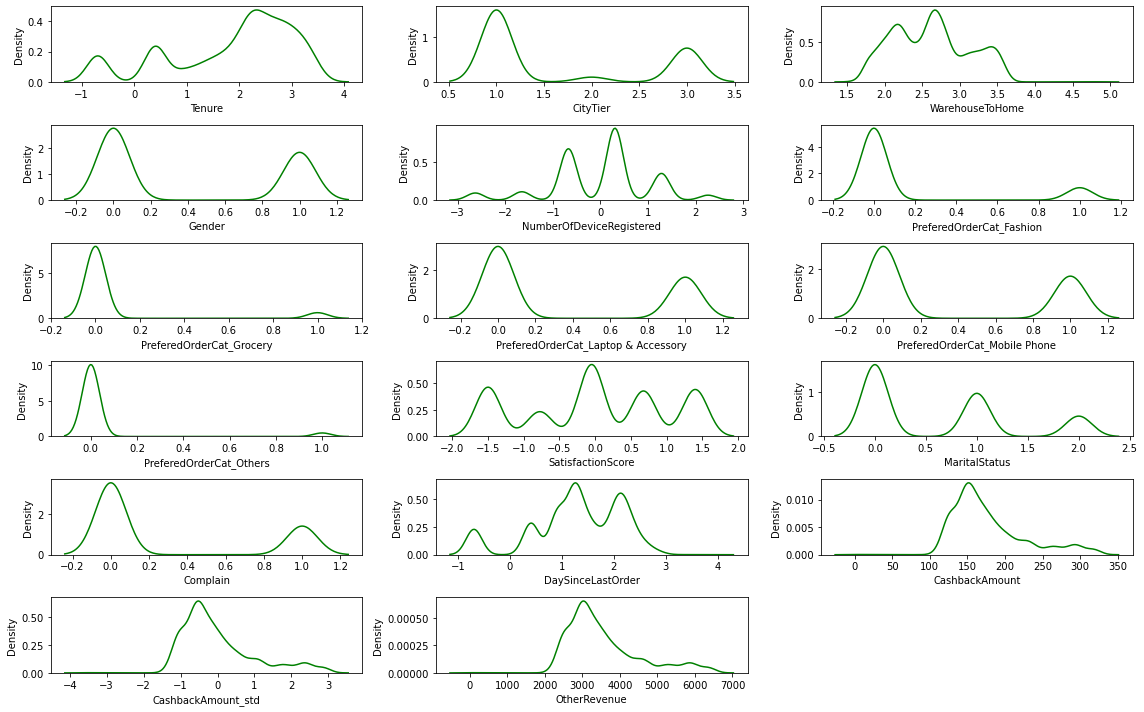

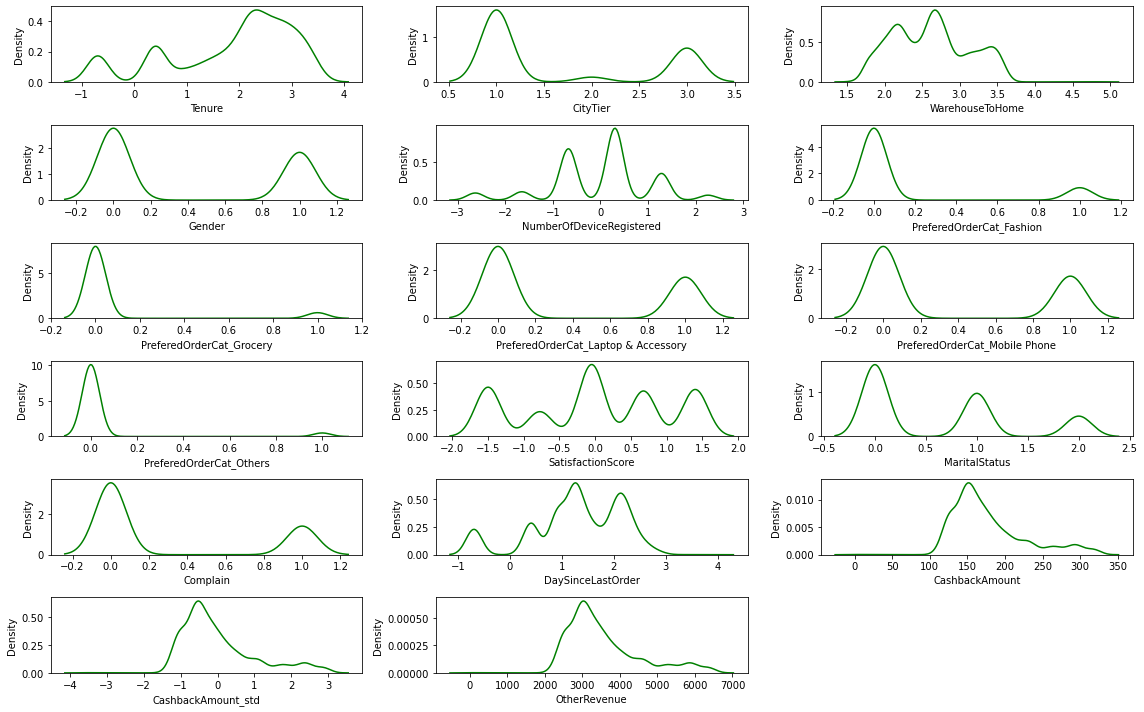

In [43]:
#distribusi nilai asli
c = [Xtrain,Xtest]
for i in c:
    features = ['Tenure','CityTier','WarehouseToHome','Gender','NumberOfDeviceRegistered','PreferedOrderCat_Fashion','PreferedOrderCat_Grocery',
        'PreferedOrderCat_Laptop & Accessory','PreferedOrderCat_Mobile Phone','PreferedOrderCat_Others','SatisfactionScore','MaritalStatus',
        'Complain','DaySinceLastOrder','CashbackAmount','CashbackAmount_std','OtherRevenue']
    plt.figure(figsize=(16, 10))
    for i in range(0, len(features)):
        plt.subplot(6, 3, i+1)
        sns.kdeplot(x=df[features[i]], color='green')
        plt.xlabel(features[i])
        plt.tight_layout()

In [44]:
ytest

,Churn
1269,0
1870,1
290,1
5237,1
4884,0
...,...
5569,0
3592,0
4854,0
5423,0


In [47]:
ytrain

array([False, False, False, ...,  True,  True,  True])